# Effectiveness of Covid-19 management and preventative measures in Ontario, Canada.
> "The Data Modelling and Model validation part of the project ."

- toc: true
- branch: master
- badges: true
- comments: true
- author: Enobong Udoh
- categories: [data modelling, model validation, Covid-19, Ontario, Canada]
- image: images/project_thumbnails/ontario_covid.png
- hide: true
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2



## Data collection

The following datasets were identified to fulfill the analysis requirement: 

1. Ontario's Covid-19 Pandemic and Vaccination trends from 25-January-2020 to 17-July-2021
  - [Data Source](https://covid19tracker.ca/vaccinationtracker.html) 

2. Confirmed Positive Cases in cities within Ontario (with age)
  - [Data Source](https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario)
  - [Data Dictionary](https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario)

3. Ontario Vaccination data (by age)
  - [Data Source](https://data.ontario.ca/en/dataset/covid-19-vaccine-data-in-ontario/resource/775ca815-5028-4e9b-9dd4-6975ff1be021)  
  - [Data Dictionary](https://data.ontario.ca/en/dataset/covid-19-vaccine-data-in-ontario)

4. Google Covid-19 mobility report
  - [Data Source](https://www.google.com/covid19/mobility/)
  - [Data Dictionary](https://www.google.com/covid19/mobility/data_documentation.html?hl=en)
    Note: The baseline in mobility data is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020
---

## Data understanding

Features Explored In Ontario's Covid-19 Pandemic and Vaccination trends from 25-January-2020 to 17-July-2021:

1. `date` - The date of activities captured in the dataset
2. `change_cases` - The number of new cases as of each day
3. `change_fatalities` - The number of new hospitalizations as of each day
4. `change_tests` - The number of new tests as of each day
5. `change_hospitalizations` - The number of new hospitalizations as of each day
6. `change_criticals` - The number of new critcal cases as of each day
7. `change_recoveries` - The number of recovered patients as of each day
8. `change_vaccinations` - The number of new single-dosed vaccinated people as of each day
9. `change_vaccinated` - The number of fully vaccinated people as of each day
10. `change_vaccines_distributed` - The number of vaccines made available to the province as of each day
11. `total_cases` - Total number of covid cases 
12. `total_fatalities` - Total number of covid-related fatalities 
13. `total_tests` - Total number of covid tests 
14. `total_hospitalizations` - Total number of covid-related hospitalizations 
15. `total_critcals` - Total number of covid-related critical care patients
16. `total_recoveries` - Total number of recoveries
17. `total_vaccinations` - Total number of covid vaccinations (first dose)
18. `total_vaccinated` - Total number of fully vaccinated people
19. `total_vaccines_distributed` - Total number of vaccines distributed across the province


**NOTE:** Other Datasets used are accompanied with links to their dictionaries above.

<br>



## Importing project dependencies

---
Required libraries are:

1. ` pandas` : required to access dataset .csv file and work with data in tabular representation.

2. ` numpy` required to round the data in the correlation matrix.

3. ` matplotlib, seaborn, pylab` required for data visualization. 

4. `sklearn`: This library was used to access machine learning modules for prediction-related tasks.


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits.mplot3d as m3d
import seaborn as sns
import matplotlib
from pylab import *
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# verifying numpy and pandas version being used
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

numpy version: 1.20.1
pandas version: 1.2.4


## Data Modelling

### Utility function

The following utility function is used to support the data modelling activity.

In [ ]:
# creating total_cases df with features that have > 0.75 correlation to total_cases

# first - get the columns where correlation > 0.75
'''
Displays a list of columns that meet or exceed your specified correlation limit for linear regression

    df: main data frame

    map_column: this column would be used to check how other columns correlate with it

    corr_limit: The mimimum degree/value to which the other column should correlate to the map_column

'''
collist = []
def get_cols_that_meet_corr_limit(df, map_column, corr_limit):
  i = 0
  for cols in df.columns:
    if df[map_column].corr(df[cols], method='pearson') >= corr_limit:
      print(f"{cols}: {df[map_column].corr(df[cols], method='pearson')}")
      collist.append(cols)
      i += 1
  print("\n\nYou can apply the above columns to your df using 'collist'. \nSyntax: df[collist]")


**`Predicting daily total covid cases in Ontario:`**


**Null hypothesis:** There is no correlation between the features and variables in the dataset i.e. correlation coefficients of features and target variable is zero

**Alternative hypothesis:** There is linear correlation of 0.75 and over between features and the prediction target in the data.


### Using Linear Regression and statsmodel - OLS

**`Note`**: Test_train_split was used for generating training and validation data

In [ ]:
# reading clean version of primary data for modelling
ontariocovid_vaccine_ts_df = pd.read_pickle('data/ontario-covid/ontario_df.pickle')

In [ ]:
get_cols_that_meet_corr_limit(ontariocovid_vaccine_ts_df, 'total_cases', 0.75)

change_vaccinations: 0.8881474290199121
total_cases: 1.0
total_fatalities: 0.9620482022491743
total_tests: 0.9776739655614067
total_criticals: 0.7898145037222213
total_recoveries: 0.9987566183371787
total_vaccinations: 0.826234970908273
total_vaccines_distibuted: 0.8265012758088542


You can apply the above columns to your df using 'collist'. 
Syntax: df[collist]


In [ ]:
# create df 
tc_prediction_df = ontariocovid_vaccine_ts_df[collist] 
tc_prediction_df.head(3)

,change_vaccinations,total_cases,total_fatalities,total_tests,total_criticals,total_recoveries,total_vaccinations,total_vaccines_distibuted
2020-01-25 00:00:00-05:00,0,1,0,0,0,0,0,0
2020-01-26 00:00:00-05:00,0,2,0,0,0,0,0,0
2020-01-27 00:00:00-05:00,0,2,0,0,0,0,0,0


In [ ]:
# defining features for model
features = tc_prediction_df.drop(columns=['total_fatalities','total_recoveries','total_cases','total_criticals','total_vaccinations','total_vaccines_distibuted'])
features.head(3)

,change_vaccinations,total_tests
2020-01-25 00:00:00-05:00,0,0
2020-01-26 00:00:00-05:00,0,0
2020-01-27 00:00:00-05:00,0,0


In [ ]:
# define prediction target 
target_prediction = tc_prediction_df['total_cases']

In [ ]:
# verifying that the featture matrix and precition variables are of equal length
print(len(features))
print(len(target_prediction))

540
540


In [ ]:
# split data
# put Xs together then Ys together - so that the split maps to features and target_pred. correctly

X_train, X_test, y_train, y_test = train_test_split(features, target_prediction, test_size=0.30, random_state=0)

In [ ]:
#  using Linear Regression - create and fit model
model_tc = LinearRegression()
model_tc.fit(X_train,y_train)


LinearRegression()

In [ ]:
# getting the model parameters - beta_0 and beta_1
print(f"The y_intercept of the model (beta_0) is: {model_tc.intercept_:.5f}")
print(f"The slopes of the model (beta_1) are: \n{model_tc.coef_[0]:.5f}: for changes_vaccination \n{model_tc.coef_[1]:.5f}: for total tests")

The y_intercept of the model (beta_0) is: -11860.45354
The slopes of the model (beta_1) are: 
0.79914: for changes_vaccination 
0.02542: for total tests


In [ ]:
# assessing accuracy of the model
print(f"The model score on the training data is: {model_tc.score(X_train, y_train):.3f}")

The model score on the training data is: 0.982


In [ ]:
# verifying that the featture matrix and precition variables are of equal length
print(len(X_test))
print(len(y_test))

162
162


In [ ]:
# testing the model on the 30% of the sample size
lin_model_pred_df = X_test.copy()
lin_model_pred_df['total_cases'] = y_test


In [ ]:
lin_model_pred_df['predicted_total_cases'] = np.round(model_tc.predict(X_test)).astype(int)
lin_model_pred_df.iloc[120:130]

,change_vaccinations,total_tests,total_cases,predicted_total_cases
2020-12-01 00:00:00-05:00,0,6309556,118199,148559
2020-11-05 00:00:00-05:00,0,5264568,80690,121990
2021-05-05 00:00:00-04:00,132603,14310628,479633,457954
2021-02-08 00:00:00-05:00,6987,10054325,279472,249353
2020-08-08 00:00:00-04:00,0,2372441,39967,48459
2020-12-08 00:00:00-05:00,0,6665787,130910,157616
2021-07-15 00:00:00-04:00,166201,16282312,547705,534934
2020-05-17 00:00:00-04:00,0,544826,22653,1992
2020-10-22 00:00:00-04:00,0,4785832,67527,109819
2020-02-01 00:00:00-05:00,0,0,3,-11860


In [ ]:
# assessing actual cases vs predicted cases using accuracy and error metrics
print(f"The measure of accuracy for the model using r-squared is: {r2_score(lin_model_pred_df['total_cases'], lin_model_pred_df['predicted_total_cases']):.4f}")
print(f"The mean absolute error for the model is: {mean_absolute_error(lin_model_pred_df['total_cases'], lin_model_pred_df['predicted_total_cases']):.2f}")
print(f"The mean squared error for the model is: {mean_squared_error(lin_model_pred_df['total_cases'], lin_model_pred_df['predicted_total_cases']):.2f}")

The measure of accuracy for the model using r-squared is: 0.9815
The mean absolute error for the model is: 22187.13
The mean squared error for the model is: 686918812.52


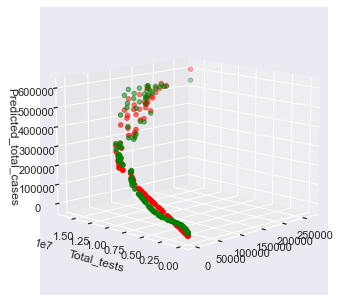

In [ ]:
#collapse-hide
fig3d = m3d.Axes3D(plt.figure())
fig3d.set_ylabel('Total_tests')
fig3d.set_zlabel('Predicted_total_cases')
fig3d.view_init(12, 225)
fig3d.scatter3D(xs=lin_model_pred_df['change_vaccinations'], ys=lin_model_pred_df['total_tests'], zs= lin_model_pred_df['total_cases'] , color = 'green')
fig3d.scatter3D(xs=lin_model_pred_df['change_vaccinations'], ys=lin_model_pred_df['total_tests'], zs= lin_model_pred_df['predicted_total_cases'] , color = 'red')

plt.show();

In [ ]:
# confirming model using statsmodels
import pandas.testing as tm
import statsmodels.formula.api as smf

tc_ml_stats_df = smf.ols("total_cases ~ total_tests  + change_vaccinations", data=ontariocovid_vaccine_ts_df) 
# tc_ml_stats_df = smf.ols("total_fatalities ~ total_cases + total_tests + total_recoveries", data=ontariocovid_vaccine_ts_df) 

output = tc_ml_stats_df.fit()

output.summary()
# diamond_reg_cut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.462e+04
Date:                Sat, 11 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:51:13   Log-Likelihood:                -6238.7
No. Observations:                 540   AIC:                         1.248e+04
Df Residuals:                     537   BIC:                         1.250e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.211e+04   1769.940     -6.844      0.000   -1.56e+04   -8635.777
total_tests             0.0254      0.000     75.841      0.000       0.025       0.026
change_vaccinations     0.8358      0.030     27.889      0.000       0.777       0.895
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.515
Skew:                          -0.157   Prob(JB):                        0.284
Kurtosis:                       2.883   Cond. No.                     1.36e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **`Using Decision Tree Regressor and Random Forest Regressor`**

In [ ]:
# using --- DECISION TREE REGRESSOR ------
dt_model = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [ ]:
print(f"The decision tree regressor model score is: {dt_model.score(X_train, y_train):.4f}")    # getting model score

The decision tree regressor model score is: 0.9995


In [ ]:
dt_lin_pred_df = lin_model_pred_df.copy()
dt_lin_pred_df.head(2)

,change_vaccinations,total_tests,total_cases,predicted_total_cases
2020-04-05 00:00:00-04:00,0,75046,4038,-9952
2021-02-19 00:00:00-05:00,16967,10588786,290771,270917


In [ ]:
dt_lin_pred_df['dt_predicted_total_cases'] = np.round(dt_model.predict(X_test)).astype(int)
dt_lin_pred_df.head(3)

,change_vaccinations,total_tests,total_cases,predicted_total_cases,dt_predicted_total_cases
2020-04-05 00:00:00-04:00,0,75046,4038,-9952,6071
2021-02-19 00:00:00-05:00,16967,10588786,290771,270917,283075
2021-06-01 00:00:00-04:00,120195,15242915,532158,471742,534608


In [ ]:
# assessing actual cases vs predicted cases using accuracy and error metrics
print(f"The measure of accuracy for the decision tree model using r-squared is: {r2_score(dt_lin_pred_df['total_cases'], dt_lin_pred_df['dt_predicted_total_cases']):.4f}")
print(f"The mean absolute error for the decision tree model is: {mean_absolute_error(dt_lin_pred_df['total_cases'], dt_lin_pred_df['dt_predicted_total_cases']):.4f}")
print(f"The mean squared error for the decision tree model is: {mean_squared_error(dt_lin_pred_df['total_cases'], dt_lin_pred_df['dt_predicted_total_cases']):.4f}")

The measure of accuracy for the decision tree model using r-squared is: 0.9991
The mean absolute error for the decision tree model is: 4190.6173
The mean squared error for the decision tree model is: 34939382.6914


In [ ]:
# EXPLORING ---  the prediction with RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor 
rf_model = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
rf_model.score(X_train, y_train)

0.99989954792897

In [ ]:
rf_lin_pred_df = dt_lin_pred_df.copy()
rf_lin_pred_df.head(2)

,change_vaccinations,total_tests,total_cases,predicted_total_cases,dt_predicted_total_cases
2020-04-05 00:00:00-04:00,0,75046,4038,-9952,6071
2021-02-19 00:00:00-05:00,16967,10588786,290771,270917,283075


In [ ]:
rf_lin_pred_df['rf_predicted_total_cases'] = np.round(rf_model.predict(X_test)).astype(int)
rf_lin_pred_df.tail()

,change_vaccinations,total_tests,total_cases,predicted_total_cases,dt_predicted_total_cases,rf_predicted_total_cases
2021-05-19 00:00:00-04:00,145461,14856381,514690,482105,521865,516358
2021-07-04 00:00:00-04:00,196068,16037441,545803,552576,544110,544574
2020-09-30 00:00:00-04:00,0,3923465,51710,87893,41744,49117
2021-03-08 00:00:00-05:00,21882,11436417,309927,296396,301831,308024
2020-09-19 00:00:00-04:00,0,3508463,46484,77342,41744,41926


In [ ]:
# assessing actual cases vs predicted cases using accuracy and error metrics
print(f"The measure of accuracy for the random forest regression model using r-squared is: {r2_score(rf_lin_pred_df['total_cases'], rf_lin_pred_df['rf_predicted_total_cases']):.4f}")
print(f"The mean absolute error for the random forest regression model is: {mean_absolute_error(rf_lin_pred_df['total_cases'], rf_lin_pred_df['rf_predicted_total_cases']):.4f}")
print(f"The mean squared error for the random forest regression model is: {mean_squared_error(rf_lin_pred_df['total_cases'], rf_lin_pred_df['rf_predicted_total_cases']):.4f}")

The measure of accuracy for the random forest regression model using r-squared is: 0.9999
The mean absolute error for the random forest regression model is: 1637.0062
The mean squared error for the random forest regression model is: 5501746.7469


### Observations
- Regression models were used to predict the total number of cases daily in ontario as the data is continous.

- Linear regression was choosen for modelling because strong linear relationships, moving toward 1, were identified between total cases and other features in the data. 

- The model was trained based on patterns learned from total tests and changes in daily partial vaccination activities in the province. These features were selected as in addition to their linear relationship with total cases, a lower amount of multicollinearity was obeserved between the independent variables. 

- For the models created with test_train_split data, a test_size of 30% was defined, thereby making the train_size on 70% of the data.

- The Linear regression model had an approximate accuracy score of 0.982. After model fitting, the model was used to predict total cases, given the the test features and the  R-squared error was approximately 0.9815.

- validating the model using statsmodel.formala.api, an R-squared score of approximately 0.982 was also obtained and the confidence level of prediction accuracy is 97.5%.

- Based on the linear regression model, it can be interpreted that for every case increase in the total number of cases in ontario, there'll be aproximately a 0.799 increase in partial vaccinations and a 0.025 increase in total tests.

- Mathematically: 
  
    `total_cases = -11860.454 + (0.799 * change_vaccinations) +  (0.025 * total_tests)`

- The decision tree regressor algorithm was also explored for prediction. This model shows that it has better prediction abilities with an R-squared score of 0.993 and lower mean errors (MAE and MSE) for it's prediction on the test data, in comparison to linear regression.

- Further attempt to predict total cases per day was done using random forest regressor. This is because the model uses features at random and has a higher likelihood of reducing bias, unlike decison tree which uses all the features. This model was shown to have a higher accuracy score and lower mean errors than the previous models (**`Recommended`**). 

- We will reject the null hypothesis as we have sufficient statistical evidence against the null hypothesis

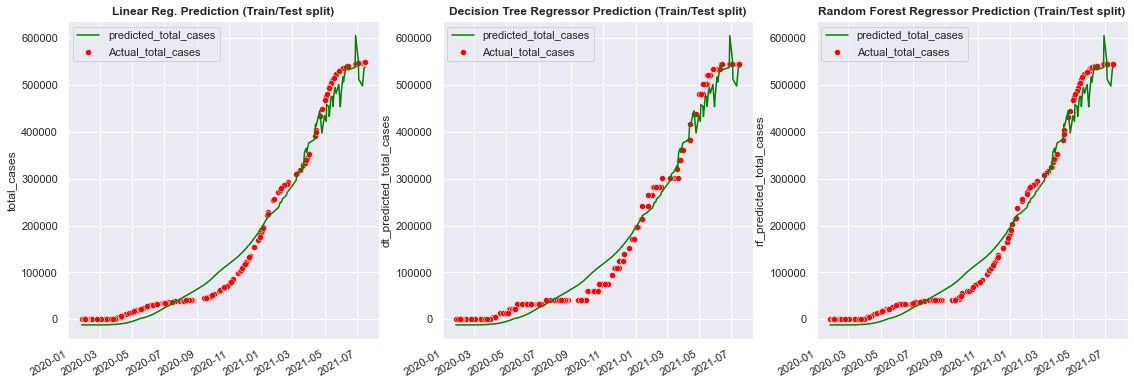

In [ ]:
gridspec.GridSpec(1,3)
plt.figure(figsize=(19,6.5))
plt.subplot2grid((1,3),(0,0))
sns.scatterplot(x= lin_model_pred_df.index, y=lin_model_pred_df['total_cases'], color='red', label='Actual_total_cases')
lin_model_pred_df['predicted_total_cases'].plot(color='green')
plt.title("Linear Reg. Prediction (Train/Test split)", fontdict={'fontweight':'bold'})
plt.legend()

plt.subplot2grid((1,3),(0,1))
sns.scatterplot(x= rf_lin_pred_df.index, y=rf_lin_pred_df['dt_predicted_total_cases'], color='red', label='Actual_total_cases')
lin_model_pred_df['predicted_total_cases'].plot(color='green')
plt.title("Decision Tree Regressor Prediction (Train/Test split)", fontdict={'fontweight':'bold'})
plt.legend()

plt.subplot2grid((1,3),(0,2))
sns.scatterplot(x= rf_lin_pred_df.index, y=rf_lin_pred_df['rf_predicted_total_cases'], color='red', label='Actual_total_cases')
lin_model_pred_df['predicted_total_cases'].plot(color='green')
plt.title("Random Forest Regressor Prediction (Train/Test split)", fontdict={'fontweight':'bold'})
plt.legend()

plt.savefig('ontario-images/fig_model_first', format='png')
plt.show()


## Model Validation


**`Exploring KFold to validate models. First, linear models on two versions of the features and target variable`**

**`Note:`** Models defined above are recalled for training and prediction.



In [ ]:
# validating the model using multiple split versions of the data
# First, initialize KFold 

kf_select = KFold(n_splits=5, shuffle = True, random_state=1)

In [ ]:
# combine features and target_prediction into one df for split
kf_df = pd.concat([features, target_prediction], axis=1)
kf_df

,change_vaccinations,total_tests,total_cases
2020-01-25 00:00:00-05:00,0,0,1
2020-01-26 00:00:00-05:00,0,0,2
2020-01-27 00:00:00-05:00,0,0,2
2020-01-28 00:00:00-05:00,0,0,2
2020-01-29 00:00:00-05:00,0,0,2
...,...,...,...
2021-07-13 00:00:00-04:00,176834,16221898,547409
2021-07-14 00:00:00-04:00,179197,16250983,547562
2021-07-15 00:00:00-04:00,166201,16282312,547705
2021-07-16 00:00:00-04:00,168616,16310438,547864


In [ ]:
# use kf_select to create two subsets of the features df
set_1, set_2, set_3, set_4, set_5 = kf_select.split(kf_df)


In [ ]:
set_1

(array([  0,   1,   2,   3,   6,   7,   8,  10,  11,  12,  13,  14,  15,
         16,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,  30,  32,
         33,  35,  36,  37,  38,  39,  43,  44,  45,  46,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  63,  64,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  91,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 112,
        113, 114, 115, 116, 118, 120, 121, 122, 123, 124, 125, 126, 127,
        129, 130, 131, 134, 136, 137, 138, 139, 140, 141, 143, 144, 145,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 161,
        163, 164, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177,
        178, 180, 181, 182, 183, 184, 186, 188, 190, 191, 192, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 215, 216, 217

In [ ]:
# creating the train and test features from subset_1 of the Kfold split

# train
kf_X_train_1 = kf_df.iloc[set_1[0], :-1]
kf_y_train_1  = kf_df.iloc[set_1[0], -1]

# test
kf_X_test_1  = kf_df.iloc[set_1[1], :-1]
kf_y_test_1  = kf_df.iloc[set_1[1], -1]


In [ ]:
# creating a kf_test_df
kf_test_df = pd.concat([kf_X_test_1, kf_y_test_1], axis=1)

In [ ]:
# training the model and measuring accuracy
result = model_tc.fit(kf_X_train_1, kf_y_train_1)
print(f"The accuracy score for set 1: {result.score(kf_X_train_1, kf_y_train_1)}\n\n")
print(f"The intercept for set 1 (lin_reg.): {result.intercept_}\n\n")
print(f"The slopes for for set 1 are: \nchange_vaccinations: {result.coef_[0]} \nchange_tests: {result.coef_[1]}")

The accuracy score for set 1: 0.9830775680037974


The intercept for set 1 (lin_reg.): -11660.203094918339


The slopes for for set 1 are: 
change_vaccinations: 0.8596611455619274 
change_tests: 0.02516026565643683


In [ ]:
# adding predicted total cases for subset1 as a column to kf_test_df
kf_test_df['pred_lin_set1'] = np.round(result.predict(kf_X_test_1)).astype(int)
kf_test_df.tail(3)

,change_vaccinations,total_tests,total_cases,pred_lin_set1
2021-07-05 00:00:00-04:00,144795,16050390,545973,516647
2021-07-07 00:00:00-04:00,204594,16093172,546411,569130
2021-07-13 00:00:00-04:00,176834,16221898,547409,548504


In [ ]:
# working with subset 2:
# train data:
kf_X_train_2 = kf_df.iloc[set_2[0], :-1]
kf_y_train_2  = kf_df.iloc[set_2[0], -1]


# test data:
kf_X_test_2  = kf_df.iloc[set_2[1], :-1]


# training the model and measuring accuracy
result_2 = model_tc.fit(kf_X_train_2, kf_y_train_2)
print(f"The model score is: {result_2.score(kf_X_train_2, kf_y_train_2)}")

# adding predicted total cases as a column to kf_test_df
kf_test_df['pred_lin_set2'] = np.round(result_2.predict(kf_X_test_2)).astype(int)
kf_test_df.tail(7)


The model score is: 0.9811968255374794


,change_vaccinations,total_tests,total_cases,pred_lin_set1,pred_lin_set2
2021-06-04 00:00:00-04:00,168322,15341218,534675,519029,536755
2021-06-20 00:00:00-04:00,184251,15676015,542198,541146,573751
2021-06-26 00:00:00-04:00,256260,15862123,543917,607732,592333
2021-06-29 00:00:00-04:00,265231,15922024,544713,616951,556791
2021-07-05 00:00:00-04:00,144795,16050390,545973,516647,540018
2021-07-07 00:00:00-04:00,204594,16093172,546411,569130,500901
2021-07-13 00:00:00-04:00,176834,16221898,547409,548504,538916


In [ ]:
# working with subset 3:
# train data:
kf_X_train_3 = kf_df.iloc[set_3[0], :-1]
kf_y_train_3  = kf_df.iloc[set_3[0], -1]


# test data:
kf_X_test_3  = kf_df.iloc[set_3[1], :-1]



# training the model and measuring accuracy
result_3 = model_tc.fit(kf_X_train_3, kf_y_train_3)
print(f"The model score is: {result_3.score(kf_X_train_3, kf_y_train_3)}")

# adding predicted total cases as a column to kf_test_df
kf_test_df['pred_lin_set3'] = np.round(result_3.predict(kf_X_test_3)).astype(int)
kf_test_df.tail(7)

The model score is: 0.9812002031564959


,change_vaccinations,total_tests,total_cases,pred_lin_set1,pred_lin_set2,pred_lin_set3
2021-06-04 00:00:00-04:00,168322,15341218,534675,519029,536755,622378
2021-06-20 00:00:00-04:00,184251,15676015,542198,541146,573751,517515
2021-06-26 00:00:00-04:00,256260,15862123,543917,607732,592333,580041
2021-06-29 00:00:00-04:00,265231,15922024,544713,616951,556791,626363
2021-07-05 00:00:00-04:00,144795,16050390,545973,516647,540018,589612
2021-07-07 00:00:00-04:00,204594,16093172,546411,569130,500901,545147
2021-07-13 00:00:00-04:00,176834,16221898,547409,548504,538916,545568


In [ ]:
# working with subset 4:
# train data:
kf_X_train_4 = kf_df.iloc[set_4[0], :-1]
kf_y_train_4  = kf_df.iloc[set_4[0], -1]


# test data:
kf_X_test_4  = kf_df.iloc[set_4[1], :-1]



# training the model and measuring accuracy
result_4 = model_tc.fit(kf_X_train_4, kf_y_train_4)
print(f"The model score is: {result_4.score(kf_X_train_4, kf_y_train_4)}")

# adding predicted total cases as a column to kf_test_df
kf_test_df['pred_lin_set4'] = np.round(result_4.predict(kf_X_test_4)).astype(int)
kf_test_df.tail(7)

The model score is: 0.9820717178337058


,change_vaccinations,total_tests,total_cases,pred_lin_set1,pred_lin_set2,pred_lin_set3,pred_lin_set4
2021-06-04 00:00:00-04:00,168322,15341218,534675,519029,536755,622378,485949
2021-06-20 00:00:00-04:00,184251,15676015,542198,541146,573751,517515,483372
2021-06-26 00:00:00-04:00,256260,15862123,543917,607732,592333,580041,475453
2021-06-29 00:00:00-04:00,265231,15922024,544713,616951,556791,626363,537217
2021-07-05 00:00:00-04:00,144795,16050390,545973,516647,540018,589612,560235
2021-07-07 00:00:00-04:00,204594,16093172,546411,569130,500901,545147,615445
2021-07-13 00:00:00-04:00,176834,16221898,547409,548504,538916,545568,549727


In [ ]:
# working with subset 5:
# train data:
kf_X_train_5 = kf_df.iloc[set_5[0], :-1]
kf_y_train_5  = kf_df.iloc[set_5[0], -1]


# test data:
kf_X_test_5  = kf_df.iloc[set_5[1], :-1]



# training the model and measuring accuracy
result_5 = model_tc.fit(kf_X_train_5, kf_y_train_5)
print(f"The model score is: {result_5.score(kf_X_train_5, kf_y_train_5)}")

# adding predicted total cases as a column to kf_test_df
kf_test_df['pred_lin_set5'] = np.round(result_5.predict(kf_X_test_5)).astype(int)
kf_test_df.tail(7)

The model score is: 0.9822749927724558


,change_vaccinations,total_tests,total_cases,pred_lin_set1,pred_lin_set2,pred_lin_set3,pred_lin_set4,pred_lin_set5
2021-06-04 00:00:00-04:00,168322,15341218,534675,519029,536755,622378,485949,552735
2021-06-20 00:00:00-04:00,184251,15676015,542198,541146,573751,517515,483372,561232
2021-06-26 00:00:00-04:00,256260,15862123,543917,607732,592333,580041,475453,486686
2021-06-29 00:00:00-04:00,265231,15922024,544713,616951,556791,626363,537217,576984
2021-07-05 00:00:00-04:00,144795,16050390,545973,516647,540018,589612,560235,559853
2021-07-07 00:00:00-04:00,204594,16093172,546411,569130,500901,545147,615445,569836
2021-07-13 00:00:00-04:00,176834,16221898,547409,548504,538916,545568,549727,570582


In [ ]:
# assessing actual cases vs predicted cases using accuracy and error metrics
print("KFold cross validation of Linear Regression model with 5 shuffled splits of the data: \n\n")
# set 1:
print(f"For set 1, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['pred_lin_set1']):.4f}")
print(f"For set 1, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set1']):.2f}")
print(f"For set 1, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set1']):.2f} \n\n")

# set 2:
print(f"For set 2, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['pred_lin_set2']):.4f}")
print(f"For set 2, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set2']):.2f}")
print(f"For set 2, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set2']):.2f} \n\n")

# set 3:
print(f"For set 3, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['pred_lin_set3']):.4f}")
print(f"For set 3, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set3']):.2f}")
print(f"For set 3, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set3']):.2f} \n\n")

# set 4:
print(f"For set 4, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['pred_lin_set4']):.4f}")
print(f"For set 4, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set4']):.2f}")
print(f"For set 4, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set4']):.2f} \n\n")

# set 5:
print(f"For set 5, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['pred_lin_set5']):.4f}")
print(f"For set 5, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set5']):.2f}")
print(f"For set 5, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set5']):.2f} \n\n")

KFold cross validation of Linear Regression model with 5 shuffled splits of the data: 


For set 1, the measure of accuracy for the model using r-squared is: 0.9768
For set 1, the mean absolute error for the model is: 21833.98
For set 1, the mean squared error for the model is: 736426645.13 


For set 2, the measure of accuracy for the model using r-squared is: 0.9643
For set 2, the mean absolute error for the model is: 25993.56
For set 2, the mean squared error for the model is: 1131357660.15 


For set 3, the measure of accuracy for the model using r-squared is: 0.9450
For set 3, the mean absolute error for the model is: 26637.72
For set 3, the mean squared error for the model is: 1744564424.00 


For set 4, the measure of accuracy for the model using r-squared is: 0.9612
For set 4, the mean absolute error for the model is: 24985.19
For set 4, the mean squared error for the model is: 1232088061.27 


For set 5, the measure of accuracy for the model using r-squared is: 0.9715
For set 

**`Observation`**
- The `set_1`, derived from a KFold split, made better predictions with a higher accuracy score than the other sets from the kfold split.  

- Mathematically, for set_1: 
  
    `total_cases = -11660.203 + (0.860 * change_vaccinations) +  (0.025 * total_tests)`

<br>

- X and y from `set 1` are used in other models 


In [ ]:
# training and testing the kfold sets using the decision tree regressor model above
kf_dt_result = dt_model.fit(kf_X_train_1, kf_y_train_1)

print(f"The model score is: {kf_dt_result.score(kf_X_train_1, kf_y_train_1)}")

# adding predicted total cases as a column to kf_test_df
kf_test_df['dt_pred_set1'] = np.round(kf_dt_result.predict(kf_X_test_1)).astype(int)
kf_test_df.tail(3)

The model score is: 0.9994921126373008


,change_vaccinations,total_tests,total_cases,pred_lin_set1,pred_lin_set2,pred_lin_set3,pred_lin_set4,pred_lin_set5,dt_pred_set1
2021-07-05 00:00:00-04:00,144795,16050390,545973,516647,540018,589612,560235,559853,544073
2021-07-07 00:00:00-04:00,204594,16093172,546411,569130,500901,545147,615445,569836,544073
2021-07-13 00:00:00-04:00,176834,16221898,547409,548504,538916,545568,549727,570582,544073


In [ ]:
# training and testing the kfold sets using the random forest regressor model above
kf_rf_result = rf_model.fit(kf_X_train_1, kf_y_train_1)

print(f"The model score is: {kf_rf_result.score(kf_X_train_1, kf_y_train_1)}")
# adding predicted total cases as a column to kf_test_df
kf_test_df['rf_pred_set1'] = np.round(kf_rf_result.predict(kf_X_test_1)).astype(int)
kf_test_df.tail(3)

The model score is: 0.9999315104390605


,change_vaccinations,total_tests,total_cases,pred_lin_set1,pred_lin_set2,pred_lin_set3,pred_lin_set4,pred_lin_set5,dt_pred_set1,rf_pred_set1
2021-07-05 00:00:00-04:00,144795,16050390,545973,516647,540018,589612,560235,559853,544073,544879
2021-07-07 00:00:00-04:00,204594,16093172,546411,569130,500901,545147,615445,569836,544073,544879
2021-07-13 00:00:00-04:00,176834,16221898,547409,548504,538916,545568,549727,570582,544073,544879


In [ ]:
# model metric for on set 1: Linear regression, 
print("Linear Regression:\n")
print(f"For set 1, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['pred_lin_set1']):.4f}")
print(f"For set 1, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set1']):.2f}")
print(f"For set 1, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['pred_lin_set1']):.2f} \n\n")

print("Decision Tree Regressor:\n")
print(f"For set 1, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['dt_pred_set1']):.4f}")
print(f"For set 1, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['dt_pred_set1']):.2f}")
print(f"For set 1, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['dt_pred_set1']):.2f} \n\n")

print("Random Forest Regressor:\n")
print(f"For set 1, the measure of accuracy for the model using r-squared is: {r2_score(kf_test_df['total_cases'], kf_test_df['rf_pred_set1']):.4f}")
print(f"For set 1, the mean absolute error for the model is: {mean_absolute_error(kf_test_df['total_cases'], kf_test_df['rf_pred_set1']):.2f}")
print(f"For set 1, the mean squared error for the model is: {mean_squared_error(kf_test_df['total_cases'], kf_test_df['rf_pred_set1']):.2f} \n\n")


Linear Regression:

For set 1, the measure of accuracy for the model using r-squared is: 0.9768
For set 1, the mean absolute error for the model is: 21833.98
For set 1, the mean squared error for the model is: 736426645.13 


Decision Tree Regressor:

For set 1, the measure of accuracy for the model using r-squared is: 0.9991
For set 1, the mean absolute error for the model is: 3959.11
For set 1, the mean squared error for the model is: 28213548.59 


Random Forest Regressor:

For set 1, the measure of accuracy for the model using r-squared is: 0.9998
For set 1, the mean absolute error for the model is: 1601.43
For set 1, the mean squared error for the model is: 5482411.00 




### **`Observations`**
- A 5-set kfold split was done to derive 5 distinct arrangements of a dataframe containing a prediction target and predictors. Each set contained a split of data for training and testing.

- Testing on a linear regression model,`set_1`, derived from the split, made the best predictions of the 5. 

- Mathematically, for set_1: 
  
    `total_cases = -11660.203 + (0.860 * change_vaccinations) +  (0.025 * total_tests)`

- Others models were explored using only X and y from `set 1` 

- The linear regression model has an accuracy score of approximately 0.9771 

- With the decision tree regressor, the prediction accuracy score (r-squared) improved from what was observed with linear regression to ~ 0.9991

- This even got better with the random forest regressor model, where the r-squared score was computed as ~ 0.9998. 

- In both decision tree and random forest regressors, the errors metrices with set_1 are lower than what was observed with the train_test_split data.

- However, random forest model made predictions with the least amount of errors across the 3 models and is recommended.

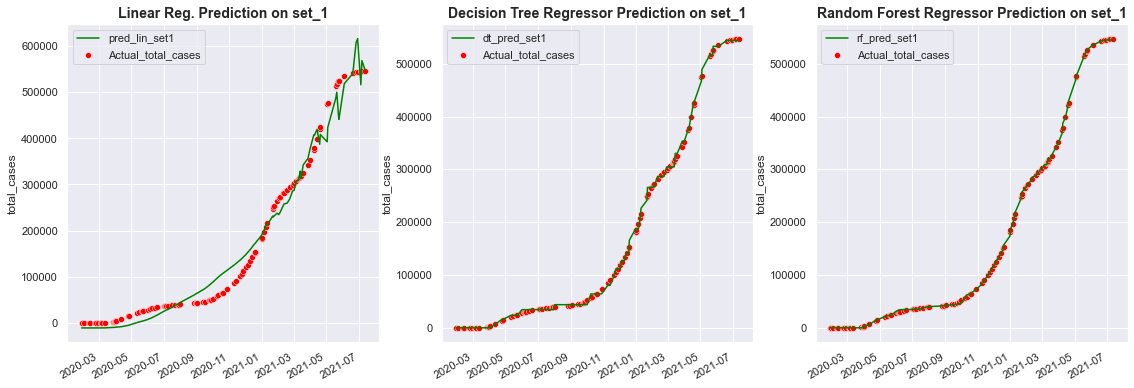

In [ ]:
gridspec.GridSpec(1,3)
plt.figure(figsize=(19,6.5))
plt.subplot2grid((1,3),(0,0))
sns.scatterplot(x= kf_test_df.index, y=kf_test_df['total_cases'], color='red', label='Actual_total_cases')
kf_test_df['pred_lin_set1'].plot(color='green')
plt.title("Linear Reg. Prediction on set_1", fontdict={'fontweight':'bold', 'size':14})
plt.legend()

plt.subplot2grid((1,3),(0,1))
sns.scatterplot(x= kf_test_df.index, y=kf_test_df['total_cases'], color='red', label='Actual_total_cases')
kf_test_df['dt_pred_set1'].plot(color='green')
plt.title("Decision Tree Regressor Prediction on set_1", fontdict={'fontweight':'bold', 'size':14})
plt.legend()

plt.subplot2grid((1,3),(0,2))
sns.scatterplot(x= kf_test_df.index, y=kf_test_df['total_cases'], color='red', label='Actual_total_cases')
kf_test_df['rf_pred_set1'].plot(color='green')
plt.title("Random Forest Regressor Prediction on set_1", fontdict={'fontweight':'bold', 'size':14})
plt.legend()

plt.savefig('ontario-images/fig_modelling', format='png')
plt.show()
